In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from quantum_clustering import QKMeans, QFCMeans
from qiskit import BasicAer
from qiskit.utils import QuantumInstance, algorithm_globals
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from fcmeans import FCM

seed = 42
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(BasicAer.get_backend('qasm_simulator'),
                                    shots=1024,
                                    optimization_level=1,
                                    seed_simulator=seed,
                                    seed_transpiler=seed)

In [6]:
# Use iris data set for training and test data
X, y = load_iris(return_X_y=True)
num_features = 2
X = np.asarray([x[0:num_features] for x, y_ in zip(X, y) if y_ != 2])
y = np.asarray([y_ for x, y_ in zip(X, y) if y_ != 2])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=seed)

In [26]:
kmeans = KMeans(n_clusters=3)

kmeans.fit(X_train)

kmeans_labels = kmeans.labels_

print(kmeans.labels_)
print(kmeans.cluster_centers_)

[1 1 0 0 1 0 0 1 0 2 0 0 2 0 1 0 1 2 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 2 0
 1 0 1 2 1 2 0 2 1 0 2 2 2 1 1 2 0 1 1 2 0 1 1 2 1 0 0 0 2 0 0 0 2 2 2 2 1
 0 1 2 0 1 2]
[[4.98648649 3.43243243]
 [5.47826087 2.63043478]
 [6.365      2.925     ]]


In [27]:
fcmeans = FCM(n_clusters=3)

fcmeans.fit(X_train)

fcmeans_labels = fcmeans.predict(X_train)

print(fcmeans.predict(X_train))
print(fcmeans.centers)

[1 1 0 2 1 0 0 1 2 1 0 2 1 0 2 0 1 1 2 0 0 2 0 1 0 0 1 2 1 2 0 2 0 2 2 1 2
 1 0 1 1 1 1 0 1 1 0 1 1 1 1 2 1 0 2 2 1 0 1 2 1 2 0 2 2 1 0 2 0 1 1 1 1 1
 0 2 1 0 1 1]
[[5.19905688 3.54930435]
 [6.13523076 2.84530897]
 [4.8405776  2.96743535]]


In [28]:
qkmeans = QKMeans(n_clusters=3,
                    quantum_instance=quantum_instance
)

qkmeans.fit(X_train)

qkmeans_labels = qkmeans.labels_

print(qkmeans.labels_)
print(qkmeans.cluster_centers_)

[1 1 0 0 1 0 0 1 0 1 0 0 2 0 1 0 1 2 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 2 0
 1 0 1 2 1 2 0 2 1 0 1 2 2 1 1 2 0 1 1 2 0 1 1 2 1 0 0 0 2 0 0 0 1 2 2 2 1
 0 1 2 0 1 2]
[[4.98648649 3.43243243]
 [5.56923077 2.59615385]
 [6.38235294 3.02941176]]


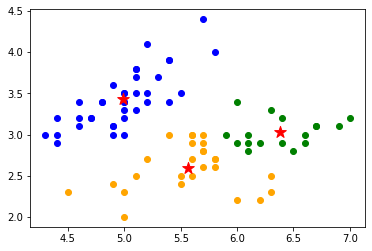

In [4]:
# Plot the results
colors = ['blue', 'orange', 'green']
for i in range(X_train.shape[0]):
    plt.scatter(X_train[i, 0], X_train[i, 1], color=colors[qkmeans.labels_[i]])
plt.scatter(qkmeans.cluster_centers_[:, 0], qkmeans.cluster_centers_[:, 1], marker='*', c='r', s=150)
plt.show()
# Predict new points
prediction = qkmeans.predict(X_test)

In [124]:
qfcmeans = QFCMeans(n_clusters=3,
                    quantum_instance=quantum_instance
)

qfcmeans.fit(X_train)

qfcm_labels = (qfcmeans.labels_)

print(qfcmeans.labels_)
print(qfcmeans.cluster_centers_)

[2 2 0 0 2 1 1 2 0 2 0 0 1 1 2 1 2 2 0 1 0 0 0 2 1 1 2 0 2 0 0 0 1 0 0 2 0
 2 1 2 2 2 2 1 2 2 1 2 2 2 2 0 2 1 0 0 2 1 2 0 2 0 1 0 0 2 1 0 0 2 2 2 2 2
 1 2 2 1 2 2]
[[4.77048691 3.1028955 ]
 [5.32419119 3.62357217]
 [5.94585812 2.74972567]]


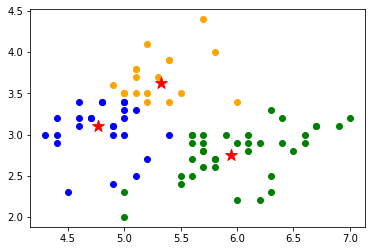

In [9]:
# Plot the results
colors = ['blue', 'orange', 'green']
for i in range(X_train.shape[0]):
    plt.scatter(X_train[i, 0], X_train[i, 1], color=colors[qfcmeans.labels_[i]])
plt.scatter(qfcmeans.cluster_centers_[:, 0], qfcmeans.cluster_centers_[:, 1], marker='*', c='r', s=150)
plt.show()
# Predict new points
prediction = qfcmeans.predict(X_test)

In [96]:
del qfcm_labels_new

In [131]:
qfcm_labels_new = np.where(qfcm_labels == 1, 2, qfcm_labels)
qfcm_labels_new = np.where(qfcm_labels == 2, 1, qfcm_labels_new)

qfcm_labels_new, qfcm_labels

(array([1, 1, 0, 0, 1, 2, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2, 1, 1, 0, 2, 0, 0,
        0, 1, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 1, 0, 1, 2, 1, 1, 1, 1, 2,
        1, 1, 2, 1, 1, 1, 1, 0, 1, 2, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 0, 1,
        2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1], dtype=int64),
 array([2, 2, 0, 0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 0, 1, 0, 0,
        0, 2, 1, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 1, 2, 2, 2, 2, 1,
        2, 2, 1, 2, 2, 2, 2, 0, 2, 1, 0, 0, 2, 1, 2, 0, 2, 0, 1, 0, 0, 2,
        1, 0, 0, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2], dtype=int64))

In [132]:
data = {"original_labels": y_train, 
           "kmeans_labels": kmeans_labels,
           "fcmeans_labels": fcmeans_labels, 
           "qkmeans_labels": qkmeans_labels,
           "qfcm_labels": qfcm_labels_new}
df = pd.DataFrame(data=data)
df.head(20)

,original_labels,kmeans_labels,fcmeans_labels,qkmeans_labels,qfcm_labels
0,1,1,1,1,1
1,1,1,1,1,1
2,0,0,0,0,0
3,0,0,2,0,0
4,1,1,1,1,1
5,0,0,0,0,2
6,0,0,0,0,2
7,1,1,1,1,1
8,0,0,2,0,0
9,1,2,1,1,1


In [133]:
# Kmeans Precision
df[df.original_labels==df.kmeans_labels].__len__() / df.shape[0]

0.7375

In [134]:
# fuzzy C-means Precision
df[df.original_labels==df.fcmeans_labels].__len__() / df.shape[0]

0.7375

In [135]:
# quantum K-means Precision
df[df.original_labels==df.qkmeans_labels].__len__() / df.shape[0]

0.775

In [136]:
# quantum fuzzy C-means Precision
df[df.original_labels==df.qfcm_labels].__len__() / df.shape[0]

0.725

In [83]:
# valiDATE
kmeans_predictions = kmeans.predict(X_test)
fcmeans_predictions = fcmeans.predict(X_test)
qkmeans_predictions = qkmeans.predict(X_test)
qfcmeans_predictions = qfcmeans.predict(X_test)

In [127]:
qfcm_predictions_new = np.where(qfcmeans_predictions == 1, 2, qfcmeans_predictions)
qfcm_predictions_new = np.where(qfcmeans_predictions == 2, 1, qfcm_predictions_new)
qfcm_predictions_new, qfcmeans_predictions

(array([1, 1, 1, 0, 2, 2, 2, 1, 2, 2, 2, 0, 1, 2, 1, 2, 1, 1, 0, 2],
       dtype=int64),
 array([2, 2, 2, 0, 1, 1, 1, 2, 1, 1, 1, 0, 2, 1, 2, 1, 2, 2, 0, 1],
       dtype=int64))

In [85]:
data_test = {"original_labels": y_test, 
        "kmeans_labels": kmeans_predictions,
        "fcmeans_labels": fcmeans_predictions, 
        "qkmeans_labels": qkmeans_predictions,
        "qfcm_labels": qfcm_predictions_new}
df = pd.DataFrame(data=data_test)
df

,original_labels,kmeans_labels,fcmeans_labels,qkmeans_labels,qfcm_labels
0,1,2,1,1,1
1,1,1,1,1,1
2,1,2,1,2,1
3,0,0,2,0,0
4,0,0,0,0,2
5,0,0,0,0,2
6,0,0,0,0,2
7,1,1,1,1,1
8,0,0,0,0,2
9,0,0,0,0,2


In [86]:
# Kmeans Precision
df[df.original_labels==df.kmeans_labels].__len__() / df.shape[0]

0.75

In [87]:
# fuzzy C-means Precision
df[df.original_labels==df.fcmeans_labels].__len__() / df.shape[0]

0.85

In [88]:
# quantum K-means Precision
df[df.original_labels==df.qkmeans_labels].__len__() / df.shape[0]

0.8

In [126]:
# quantum fuzzy C-means Precision
df[df.original_labels==df.qfcm_labels].__len__() / df.shape[0]

0.0

In [138]:
confusion_matrix(y_train, qfcm_labels_new)

array([[21,  0, 17],
       [ 4, 37,  1],
       [ 0,  0,  0]], dtype=int64)

In [139]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, qfcm_labels_new)

0.725

In [144]:
from sklearn.metrics import classification_report

print(classification_report(y_train, qfcm_labels_new, labels=[0, 1, 2]))

              precision    recall  f1-score   support

           0       0.84      0.55      0.67        38
           1       1.00      0.88      0.94        42
           2       0.00      0.00      0.00         0

    accuracy                           0.73        80
   macro avg       0.61      0.48      0.53        80
weighted avg       0.92      0.72      0.81        80



C:\Users\koppany\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koppany\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koppany\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

In [142]:
print(classification_report(y_train, qkmeans_labels))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        38
           1       0.96      0.60      0.74        42
           2       0.00      0.00      0.00         0

    accuracy                           0.78        80
   macro avg       0.65      0.52      0.57        80
weighted avg       0.98      0.78      0.85        80



C:\Users\koppany\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koppany\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\koppany\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,